In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#path = '/content/drive/MyDrive/Masters/Semester 1/Machine learning for time series and anomaly detection/PROJECT/TimeSeries/Truck_sales.csv'
path  = '/content/drive/MyDrive/JMU_Wu/ML_TSAD/Truck_sales.csv'

dataset = pd.read_csv(path)
dataset.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


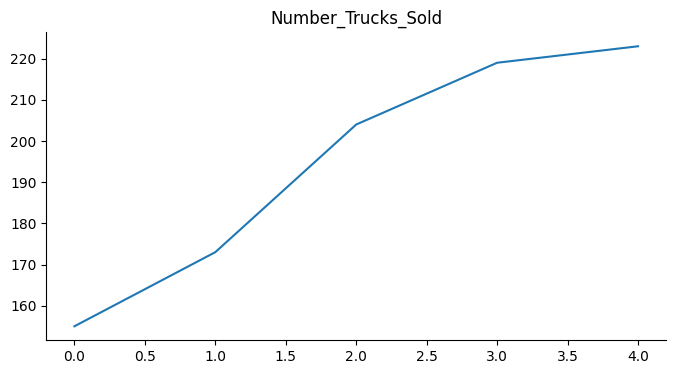

In [ ]:
from matplotlib import pyplot as plt
_df_3['Number_Trucks_Sold'].plot(kind='line', figsize=(8, 4), title='Number_Trucks_Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Spliting Data as per frequency
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(dataset))
# dates = pd.date_range(start='2003-01-01', freq='D', periods=len(dataset))
print(dates)

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')


In [ ]:
import calendar

#Extracting the month(in numeric form) from the month-year column of the dataset
dataset['Month'] = dates.month

#converting the numeric value of month into readable english form
dataset['Month'] = dataset['Month'].apply(lambda x: calendar.month_abbr[x])

#Extracting year from the month year column
dataset['Year'] = dates.year
print(dataset)

    Month-Year  Number_Trucks_Sold Month  Year
0       03-Jan                 155   Jan  2003
1       03-Feb                 173   Feb  2003
2       03-Mar                 204   Mar  2003
3       03-Apr                 219   Apr  2003
4       03-May                 223   May  2003
..         ...                 ...   ...   ...
139     14-Aug                 933   Aug  2014
140     14-Sep                 704   Sep  2014
141     14-Oct                 639   Oct  2014
142     14-Nov                 571   Nov  2014
143     14-Dec                 666   Dec  2014

[144 rows x 4 columns]


In [ ]:
#this is creating indexing of the rows of dataset using existing columns
dataset.set_index(dates, inplace=True)
dataset.head()

,Month-Year,Number_Trucks_Sold,Month,Year
2003-01-01,03-Jan,155,Jan,2003
2003-02-01,03-Feb,173,Feb,2003
2003-03-01,03-Mar,204,Mar,2003
2003-04-01,03-Apr,219,Apr,2003
2003-05-01,03-May,223,May,2003


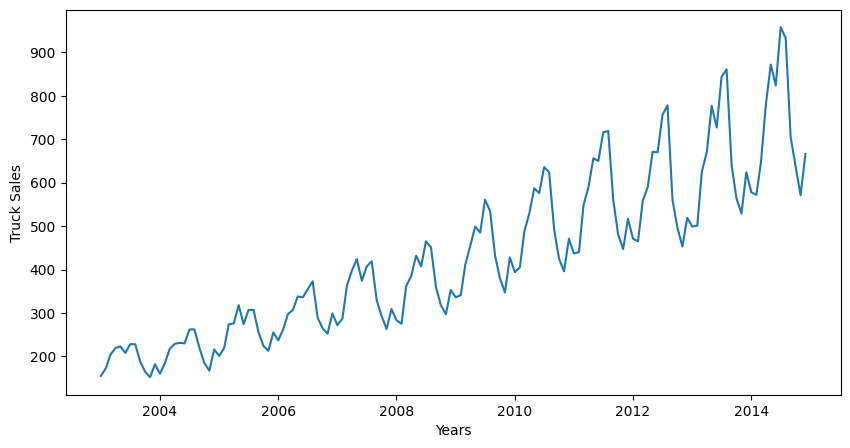

In [ ]:
#Ploting the dataset
truck_sales = dataset['Number_Trucks_Sold']
years = dataset['Year']
plt.figure(figsize = (10,5))

'''In this we don't need to provide the value of month-year data explicitly while
ploting the graph as we have created the indexing which will fetch the value of years in
the x axis according to the corresponding value of the truck sales'''
plt.plot( truck_sales)

plt.xlabel('Years')
plt.ylabel('Truck Sales')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
df = dataset
# Augmented Dickey-Fuller test for stationarity
result = adfuller(df['Number_Trucks_Sold'])

# Print the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 1.1158932574252673
p-value: 0.9953500083802601
Critical Values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}


In [ ]:
pip install sktime

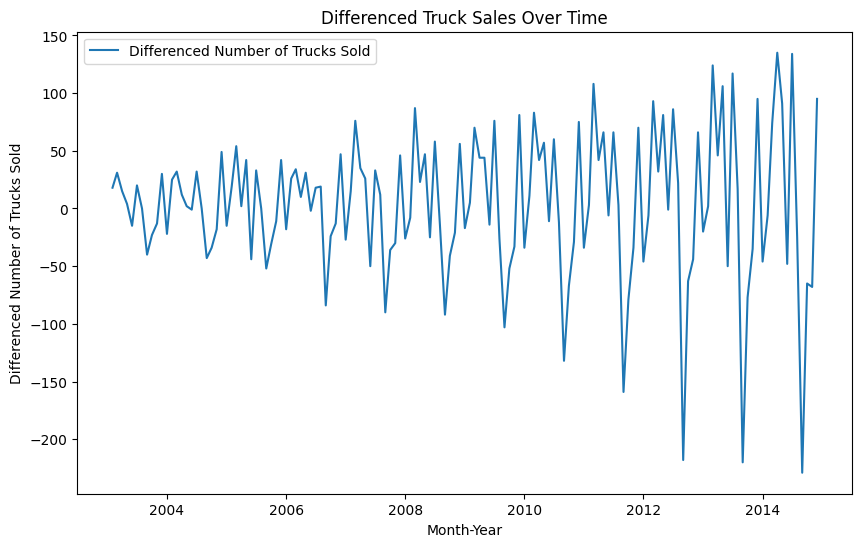

In [ ]:
# First-order differencing
df['Trucks_Sold_Diff'] = df['Number_Trucks_Sold'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(df['Trucks_Sold_Diff'], label='Differenced Number of Trucks Sold')
plt.title('Differenced Truck Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Differenced Number of Trucks Sold')
plt.legend()
plt.show()

In [ ]:
# Augmented Dickey-Fuller test for differenced series
result_diff = adfuller(df['Trucks_Sold_Diff'].dropna())

# Print the results
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

ADF Statistic (Differenced): -2.541355326769904
p-value (Differenced): 0.10573354923819939
Critical Values (Differenced): {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}


<ipython-input-48-7f3a085cb7f3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df["Number_Trucks_Sold"], palette="YlGnBu")


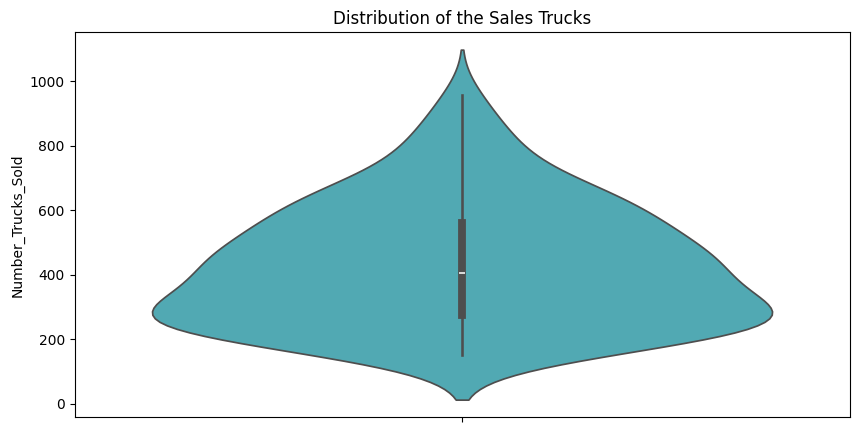

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.violinplot(df["Number_Trucks_Sold"], palette="YlGnBu")
plt.title("Distribution of the Sales Trucks")
plt.show()

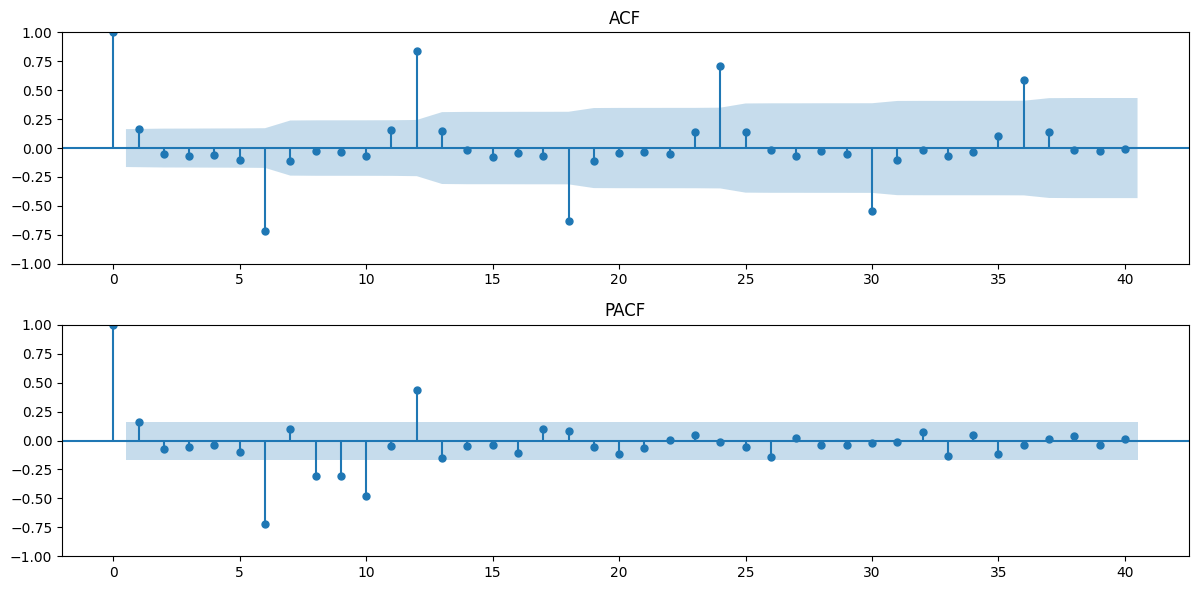

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['Trucks_Sold_Diff'].dropna(), lags=40, ax=plt.gca(), title='ACF')
plt.subplot(2, 1, 2)
plot_pacf(df['Trucks_Sold_Diff'].dropna(), lags=40, ax=plt.gca(), title='PACF')
plt.tight_layout()
plt.show()

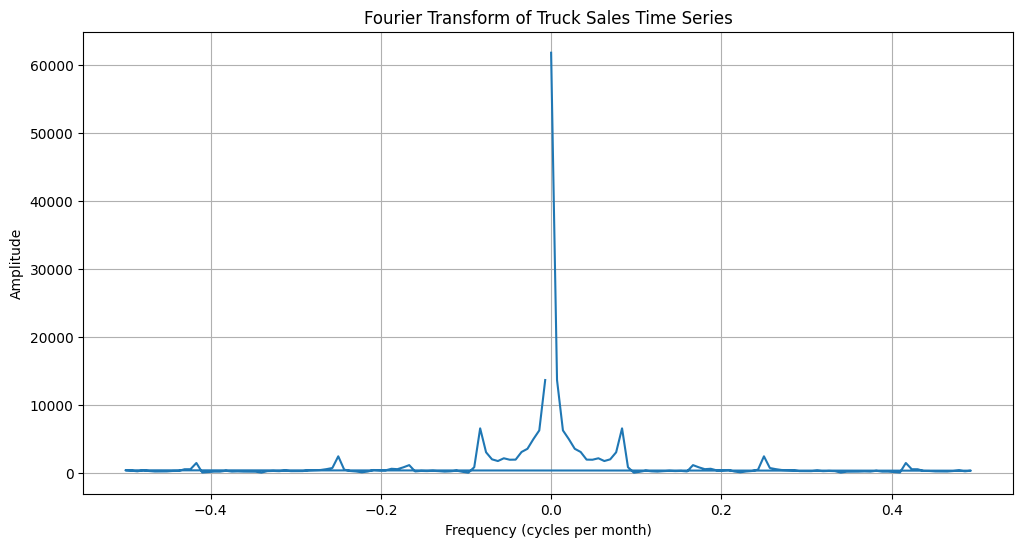

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the Fourier Transform
sales_data = df["Number_Trucks_Sold"].values
fft_result = np.fft.fft(sales_data)
freq = np.fft.fftfreq(len(sales_data), 1)  # Assuming the data is monthly, so the time interval is 1

# Plot the Fourier Transform
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(fft_result))
plt.title('Fourier Transform of Truck Sales Time Series')
plt.xlabel('Frequency (cycles per month)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sktime.datasets import load_arrow_head

from sktime.classification.interval_based import (
    CanonicalIntervalForest,
    DrCIF,
    RandomIntervalSpectralEnsemble,
    SupervisedTimeSeriesForest,
    TimeSeriesForestClassifier,)

train_X, train_Y = load_arrow_head(return_X_y=True, return_type='numpy3D', split="train")
test_X , test_Y = load_arrow_head(return_X_y= True, return_type='numpy3D', split = 'test')
# print(train_X,train_Y, test_X,test_Y)

#train data
stsf = SupervisedTimeSeriesForest(n_estimators=50, random_state=47)
stsf.fit(train_X, train_Y)

stsf_preds = stsf.predict(test_X)
print("STSF Accuracy: " + str(metrics.accuracy_score(test_Y, stsf_preds)))


STSF Accuracy: 0.6285714285714286


In [ ]:
import pandas as pd
import statsmodels.api as sm

sales_ts = df['Number_Trucks_Sold']
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')


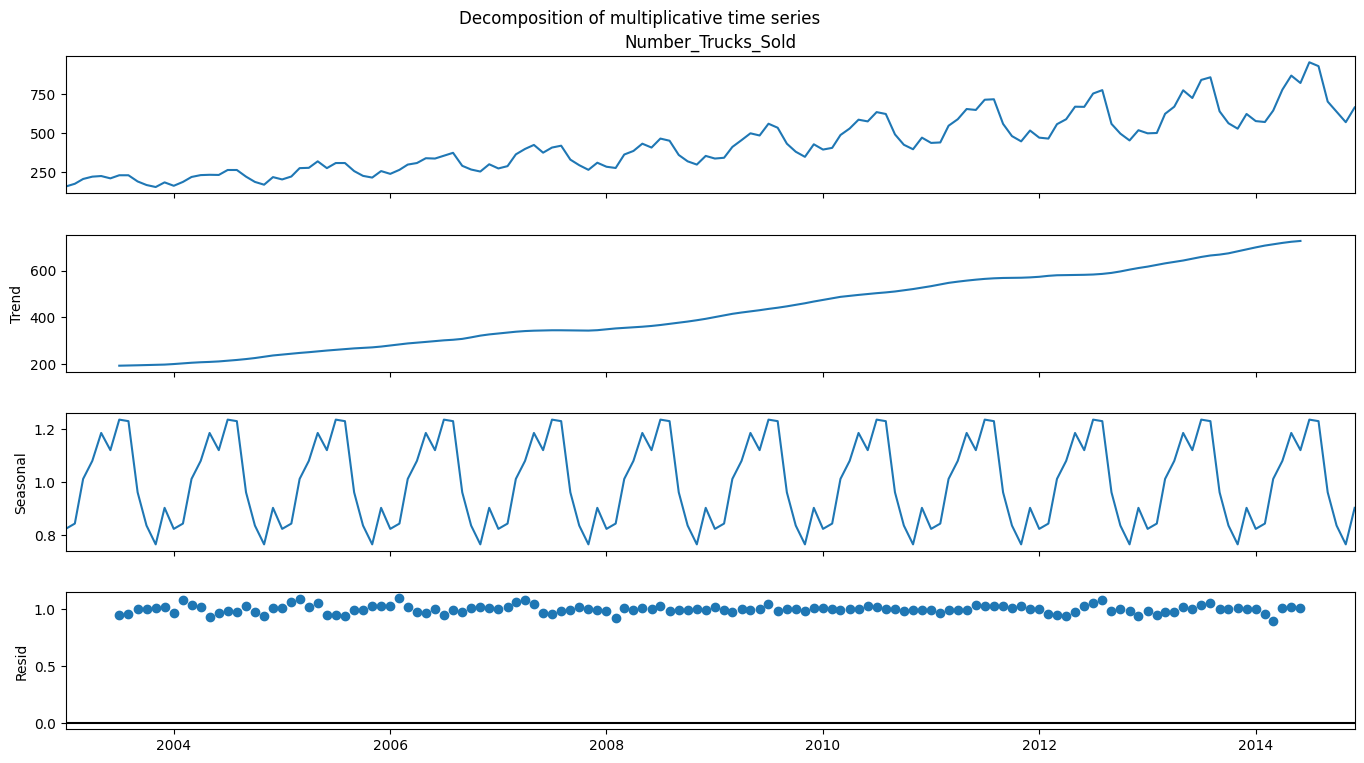

In [ ]:
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

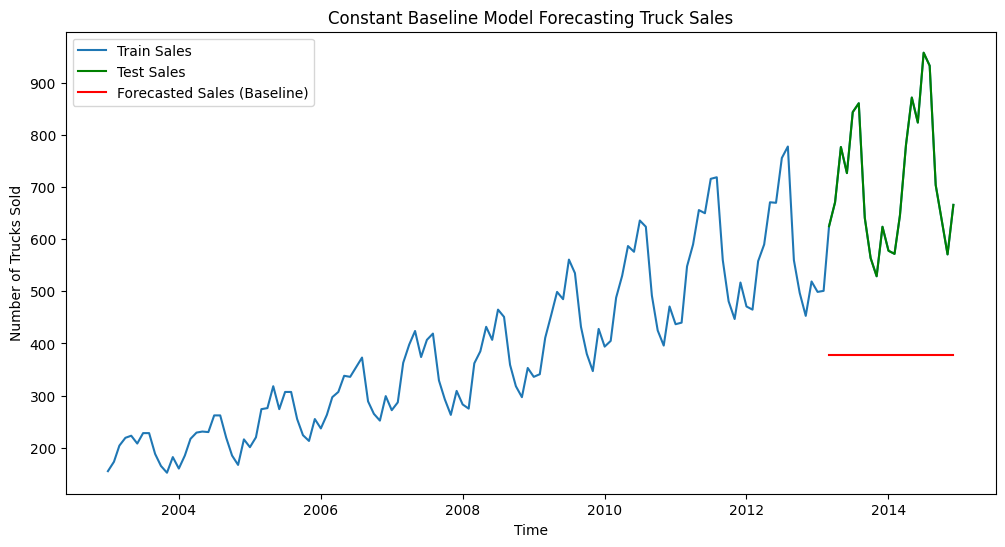

Root Mean Squared Error (RMSE): 354.0383868147616
Mean Absolute Error (MAE): 331.2943368107304
Mean Squared Error (MSE): 125343.17933839877


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'df' is your DataFrame with the 'Number_Trucks_Sold' column
sales_ts = df['Number_Trucks_Sold']

# Split the data into training and testing sets
train_sales, test_sales = train_test_split(sales_ts, test_size=0.15, shuffle=False)

# Calculate the mean of the training data
baseline_value = train_sales.mean()

# Generate forecasts for the test set (using the constant baseline value)
forecast = [baseline_value] * len(test_sales)

# Plot train sales, test sales, and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Train Sales')
plt.plot(test_sales.index, test_sales.values, label='Test Sales', color='green')
plt.plot(test_sales.index, forecast, label='Forecasted Sales (Baseline)', color='red')
plt.title('Constant Baseline Model Forecasting Truck Sales')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()

# Evaluate the baseline model performance
rmse = sqrt(mean_squared_error(test_sales, forecast))
mae = mean_absolute_error(test_sales, forecast)
mse = mean_squared_error(test_sales, forecast)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


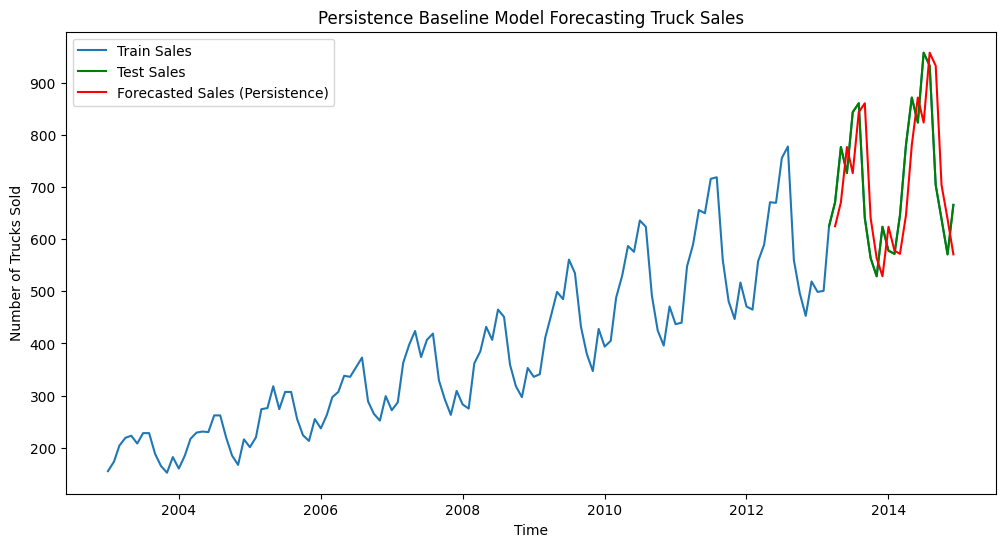

Root Mean Squared Error (RMSE): 102.29346206357658
Mean Absolute Error (MAE): 84.71428571428571
Mean Squared Error (MSE): 10463.952380952382


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'df' is your DataFrame with the 'Number_Trucks_Sold' column
sales_ts = df['Number_Trucks_Sold']

# Split the data into training and testing sets
train_sales, test_sales = train_test_split(sales_ts, test_size=0.15, shuffle=False)

# Generate forecasts for the test set (using the last observed value)
forecast = test_sales.shift(1)

# Plot train sales, test sales, and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Train Sales')
plt.plot(test_sales.index, test_sales.values, label='Test Sales', color='green')
plt.plot(test_sales.index, forecast, label='Forecasted Sales (Persistence)', color='red')
plt.title('Persistence Baseline Model Forecasting Truck Sales')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()

# Remove the first element (NaN) from the forecast and test_sales
forecast = forecast[1:]
test_sales = test_sales[1:]

# Evaluate the persistence baseline model performance
rmse = sqrt(mean_squared_error(test_sales, forecast))
mae = mean_absolute_error(test_sales, forecast)
mse = mean_squared_error(test_sales, forecast)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


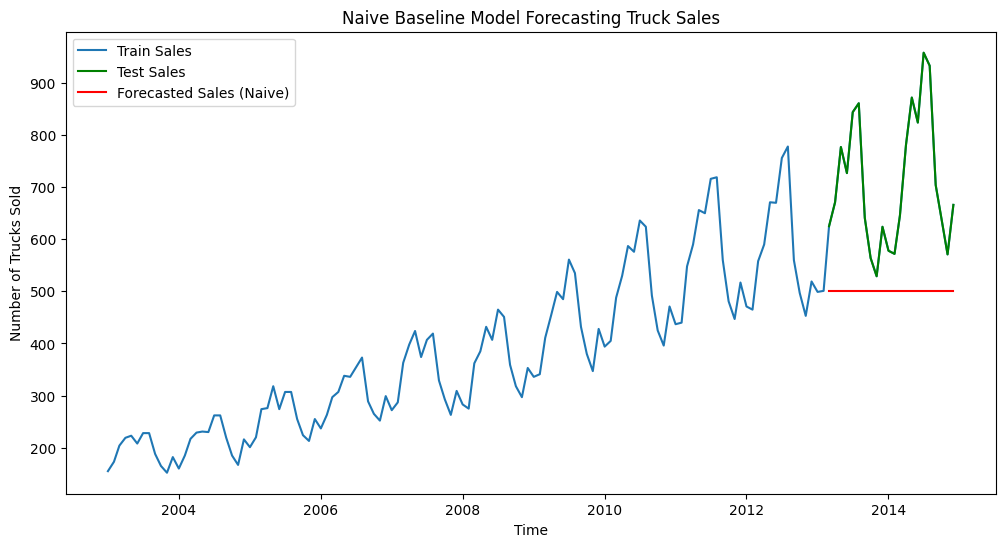

Root Mean Squared Error (RMSE): 242.94359614752332
Mean Absolute Error (MAE): 208.4090909090909
Mean Squared Error (MSE): 59021.59090909091


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'df' is your DataFrame with the 'Number_Trucks_Sold' column
sales_ts = df['Number_Trucks_Sold']

# Split the data into training and testing sets
train_sales, test_sales = train_test_split(sales_ts, test_size=0.15, shuffle=False)

# Generate forecasts for the test set (using the last observed value)
forecast = pd.Series(train_sales.iloc[-1], index=test_sales.index)

# Plot train sales, test sales, and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Train Sales')
plt.plot(test_sales.index, test_sales.values, label='Test Sales', color='green')
plt.plot(test_sales.index, forecast, label='Forecasted Sales (Naive)', color='red')
plt.title('Naive Baseline Model Forecasting Truck Sales')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()

# Evaluate the naive baseline model performance
rmse = sqrt(mean_squared_error(test_sales, forecast))
mae = mean_absolute_error(test_sales, forecast)
mse = mean_squared_error(test_sales, forecast)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


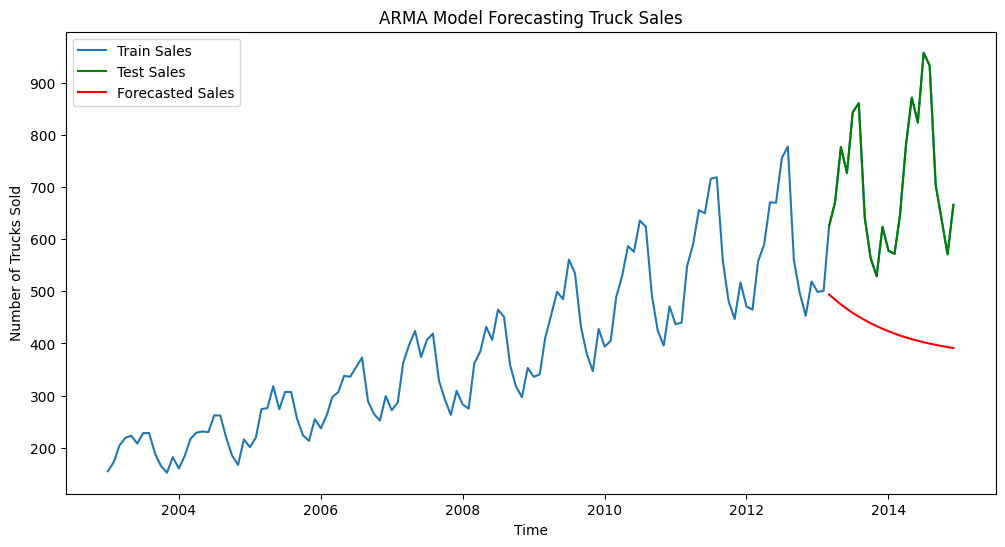

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with the 'Number_Trucks_Sold' column
sales_ts = df['Number_Trucks_Sold']


train_sales, test_sales = train_test_split(sales_ts, test_size=0.15, shuffle=False)

# Fit an ARIMA model to the train set
# For simplicity, let's use a (1, 0, 1) ARMA model
order = (1, 0, 1)
model = ARIMA(train_sales, order=order)
arima_results = model.fit()

# Generate forecasts for the test set
forecast_steps = len(test_sales)
forecast = arima_results.forecast(steps=forecast_steps)

# Plot train sales, test sales, and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Train Sales')
plt.plot(test_sales.index, test_sales.values, label='Test Sales', color='green')
plt.plot(test_sales.index, forecast, label='Forecasted Sales', color='red')
plt.title('ARMA Model Forecasting Truck Sales')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test_sales' is the actual test sales data and 'forecast' is the forecasted sales data
mae = mean_absolute_error(test_sales, forecast)
mse = mean_squared_error(test_sales, forecast)
rmse = np.sqrt(mse)

print("Arma Model Error Model Evaluation")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Arma Model Error Model Evaluation
Mean Absolute Error (MAE): 280.4371643500752
Mean Squared Error (MSE): 95905.88198277015
Root Mean Squared Error (RMSE): 309.6867481549221


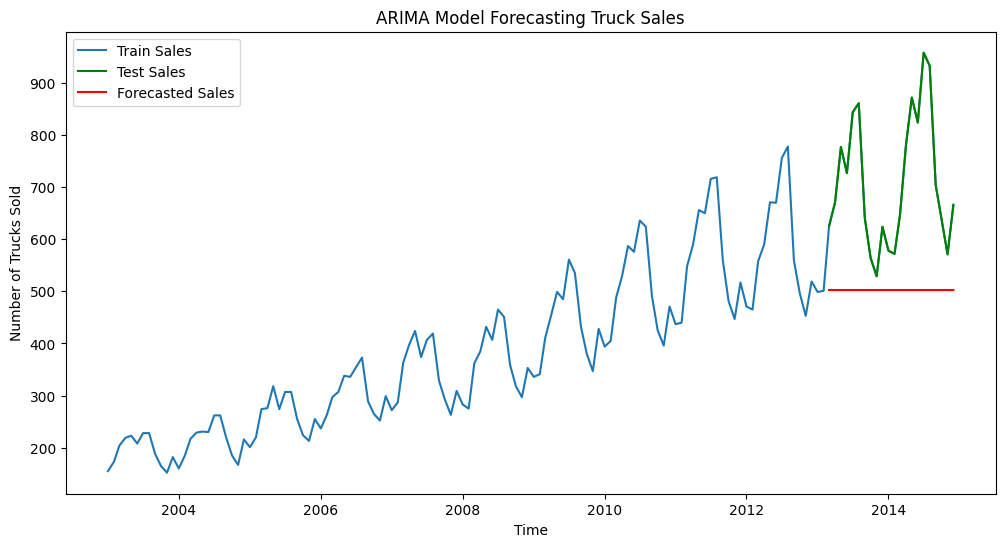

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with the 'Number_Trucks_Sold' column
sales_ts = df['Number_Trucks_Sold']


train_sales, test_sales = train_test_split(sales_ts, test_size=0.15, shuffle=False)

# Fit an ARIMA model to the train set
# For simplicity, let's use a (1, 1, 1) ARIMA model
order = (1, 1, 1)
model = ARIMA(train_sales, order=order)
arima_results = model.fit()

# Generate forecasts for the test set
forecast_steps = len(test_sales)
forecast = arima_results.forecast(steps=forecast_steps)

# Plot train sales, test sales, and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Train Sales')
plt.plot(test_sales.index, test_sales.values, label='Test Sales', color='green')
plt.plot(test_sales.index, forecast, label='Forecasted Sales', color='red')
plt.title('ARIMA Model Forecasting Truck Sales')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test_sales' is the actual test sales data and 'forecast' is the forecasted sales data
mae = mean_absolute_error(test_sales, forecast)
mse = mean_squared_error(test_sales, forecast)
rmse = np.sqrt(mse)

print("Arima Model Error Model Evaluation")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Arima Model Error Model Evaluation
Mean Absolute Error (MAE): 206.79761100401765
Mean Squared Error (MSE): 58352.90786756819
Root Mean Squared Error (RMSE): 241.56346550662042


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


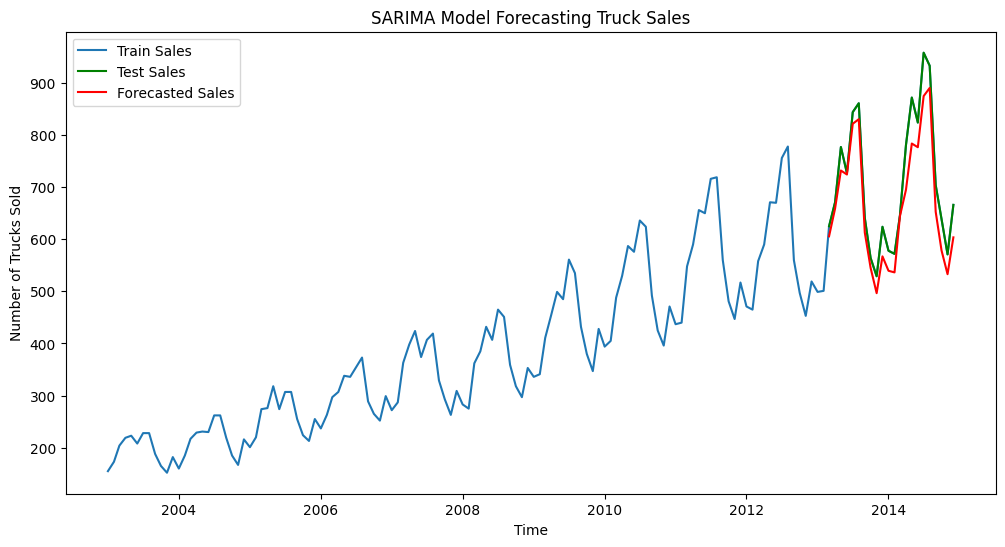

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with the 'Number_Trucks_Sold' column
sales_ts = df['Number_Trucks_Sold']


train_sales, test_sales = train_test_split(sales_ts, test_size=0.15, shuffle=False)

# Fit a SARIMA model to the train set
# For simplicity, let's use a SARIMA(1, 1, 1)x(1, 1, 1, 12) model
# This represents an ARIMA(1, 1, 1) process with a seasonal component of order (1, 1, 1, 12)
order = (5, 1, 3)
seasonal_order = (5,1,3, 12)
model = SARIMAX(train_sales, order=order, seasonal_order=seasonal_order)
sarima_results = model.fit()

# Generate forecasts for the test set
forecast_steps = len(test_sales)
forecast = sarima_results.forecast(steps=forecast_steps)

# Plot train sales, test sales, and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Train Sales')
plt.plot(test_sales.index, test_sales.values, label='Test Sales', color='green')
plt.plot(test_sales.index, forecast, label='Forecasted Sales', color='red')
plt.title('SARIMA Model Forecasting Truck Sales')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test_sales' is the actual test sales data and 'forecast' is the forecasted sales data
mae = mean_absolute_error(test_sales, forecast)
mse = mean_squared_error(test_sales, forecast)
rmse = np.sqrt(mse)

print("Sarima Model Error Model Evaluation")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Sarima Model Error Model Evaluation
Mean Absolute Error (MAE): 41.06468025801641
Mean Squared Error (MSE): 2270.3864443951234
Root Mean Squared Error (RMSE): 47.64857232273726


Forecasted Values for the Next 3 Years:
2013-03-01    605.664690
2013-04-01    658.914801
2013-05-01    731.927912
2013-06-01    724.283427
2013-07-01    821.654519
2013-08-01    830.429351
2013-09-01    612.847699
2013-10-01    544.987288
2013-11-01    496.540157
2013-12-01    567.201782
2014-01-01    539.554962
2014-02-01    536.423775
2014-03-01    644.667421
2014-04-01    695.092178
2014-05-01    783.710913
2014-06-01    776.652717
2014-07-01    874.816158
2014-08-01    890.383996
2014-09-01    652.626159
2014-10-01    578.576305
2014-11-01    532.972188
2014-12-01    603.648636
2015-01-01    575.499406
2015-02-01    573.301763
2015-03-01    688.844175
2015-04-01    743.942759
2015-05-01    835.443023
2015-06-01    831.350302
2015-07-01    937.034305
2015-08-01    952.974473
2015-09-01    701.919343
2015-10-01    622.164683
2015-11-01    570.006379
2015-12-01    647.126186
2016-01-01    614.162910
2016-02-01    607.822546
Freq: MS, Name: predicted_mean, dtype: float64


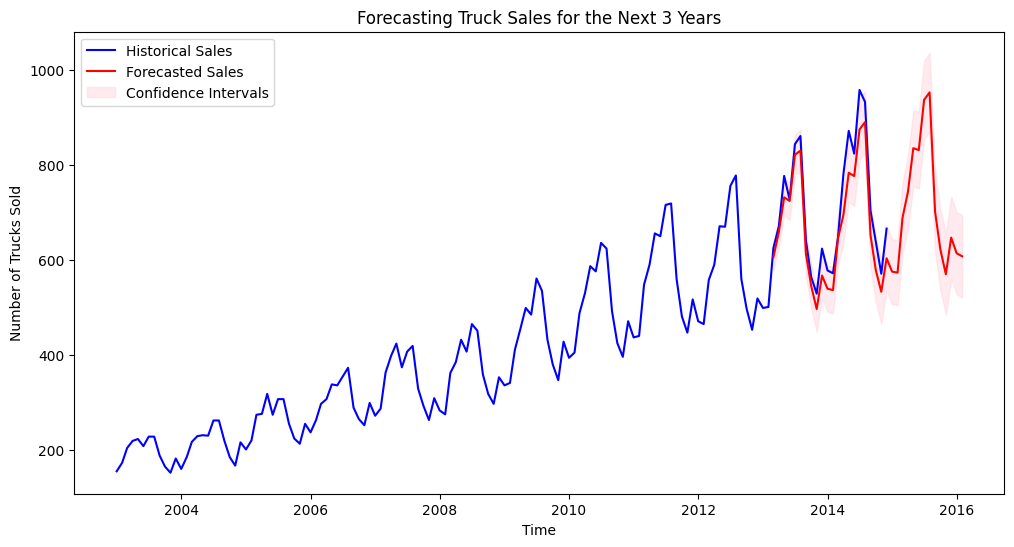

In [ ]:
# Generate forecasts for the next 3 years (assuming each year has 12 months)
forecast_steps_3_years = 3 * 12
future_forecast_3_years = sarima_results.get_forecast(steps=forecast_steps_3_years)

# Get the forecasted values and confidence intervals for the next 3 years
forecast_values_3_years = future_forecast_3_years.predicted_mean
confidence_intervals_3_years = future_forecast_3_years.conf_int()

# Print the forecasted values for the next 3 years
print("Forecasted Values for the Next 3 Years:")
print(forecast_values_3_years)

# Plot the forecasted values for the next 3 years along with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(sales_ts.index, sales_ts, label='Historical Sales', color='blue')
plt.plot(forecast_values_3_years.index, forecast_values_3_years, label='Forecasted Sales', color='red')
plt.fill_between(confidence_intervals_3_years.index, confidence_intervals_3_years.iloc[:, 0], confidence_intervals_3_years.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('Forecasting Truck Sales for the Next 3 Years')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()


In [ ]:
!pip install pmdarima


In [ ]:
#to get the best PARAMETERS
#!pip install pmdarima
#!pip install numpy pandas

import numpy as np
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your time series data
# For example, assuming 'df' is a pandas DataFrame with a 'date' and 'sales' column
# df = pd.read_csv('your_sales_data.csv')

# Assuming you have a univariate time series 'df' with a column 'sales'
y = df['Number_Trucks_Sold']

# Split the data into training and testing sets
train_size = int(len(y) * 0.8)
train, test = y[0:train_size], y[train_size:]

# Use auto_arima to perform automated hyperparameter optimization
# The 'seasonal' parameter is set to True to enable seasonal component optimization
# The 'm' parameter represents the number of periods in a season (e.g., 12 for monthly data)
# The 'd' parameter is the order of differencing
# The 'stepwise' parameter allows the algorithm to perform a stepwise search for the best parameters
# The 'suppress_warnings' parameter is set to True to suppress warnings during the search
model = auto_arima(train, seasonal=True, m=12, d=None, stepwise=True, suppress_warnings=True)

# Print the best ARIMA parameters
print("Best ARIMA Parameters:", model.get_params())

# Make predictions on the test set
predictions = model.predict(len(test))

# Evaluate the model performance
rmse = sqrt(mean_squared_error(test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Best ARIMA Parameters: {'maxiter': 50, 'method': 'lbfgs', 'order': (2, 0, 0), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': {}, 'seasonal_order': (1, 1, 2, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}
Root Mean Squared Error (RMSE): 39.0823928496072
